In [1]:
input_file = "gpmh.out"

import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow_probability as tfp

import sys

sys.path.append("/Users/jay/Desktop/Bachelorarbeit/Implementation")
from src.execute_model import run_model_single_parameter_node
from src.construct_model import get_model


ndims = 7
dims = ["TT", "C0", "beta", "ETF", "FC", "FRAC", "K2"]
colors = sns.color_palette(n_colors=ndims)

testConfigPath = "/Users/jay/Desktop/Bachelorarbeit/test_config.json"
with open(testConfigPath, "r") as file:
    run_config = json.load(file)

configPath = run_config["configPath"]
basis = run_config["basis"]
model = get_model(configPath, basis)

start_date: 2004-01-01 00:00:00
start_date_predictions: 2005-01-01 00:00:00
end_date: 2006-01-01 00:00:00
simulation length: 365
full_data_range is 732 hours including spin_up_length of 366 hours
simulation_range is of length 366 hours


In [2]:
# Construct params
configurationObject = model.configurationObject
param_lower = []
param_upper = []
for param in configurationObject["parameters"]:
    # for now the Uniform distribution is only supported
    if param["distribution"] == "Uniform":
        param_lower.append(param["lower"])
        param_upper.append(param["upper"])
    else:
        raise NotImplementedError(
            f"Sorry, the distribution {param['distribution']} is not supported yet"
        )
param_lower = np.array(param_lower)
param_upper = np.array(param_upper)


def displot(i, data):
    # Plot sampled distribution
    fig = sns.displot(data, x=dims[i], kde=True, color=colors[i])

    # Plot distribution that is sampled from
    # uni = uniform(loc=param_lower[i], scale=param_upper[i] - param_lower[i])
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i])
    x = np.linspace(param_lower[i], param_upper[i], 25000)
    y = uni.prob(x)

    # Configuration
    plt.plot(x, y, label="pdf", color="grey")
    plt.title(f"PDF of parameter {dims[i]}")
    plt.show()

def boxplot(i, data):
    sns.boxplot(data, x=dims[i], color=colors[i])
    plt.title(f"Boxplot of parameter {dims[i]}")

In [3]:
samples = pd.read_csv(f"{input_file}")
samples

,TT,C0,beta,ETF,FC,FRAC,K2
0,1.523172,0.707576,2.794859,0.331045,130.851066,0.419882,0.034288
1,1.983848,1.151665,2.413536,0.227450,162.482162,0.355340,0.032643
2,1.983848,1.151665,2.413536,0.227450,162.482162,0.355340,0.032643
3,1.983848,1.151665,2.413536,0.227450,162.482162,0.355340,0.032643
4,1.523172,0.707576,2.794859,0.331045,130.851066,0.419882,0.034288
...,...,...,...,...,...,...,...
7995,1.275433,0.768179,1.494926,0.080958,114.162194,0.216436,0.049804
7996,1.476713,0.902638,1.044300,0.061333,90.424486,0.177794,0.040537
7997,1.476875,0.849685,1.190181,0.010148,59.590404,0.181255,0.046593
7998,1.275433,0.768179,1.494926,0.080958,114.162194,0.216436,0.049804


# Plotting

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

2024-05-23 22:04:39.756905: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-23 22:04:39.756930: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-23 22:04:39.756937: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-23 22:04:39.756954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-23 22:04:39.756965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


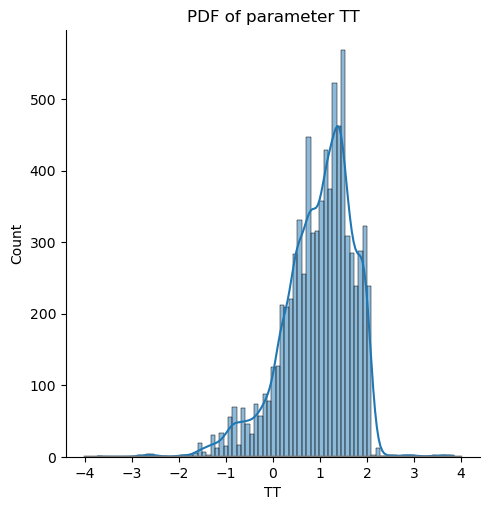

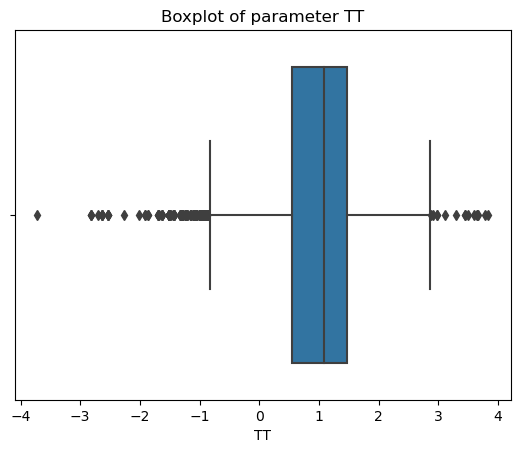

In [4]:
# Plot TT
displot(0, samples)
boxplot(0, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



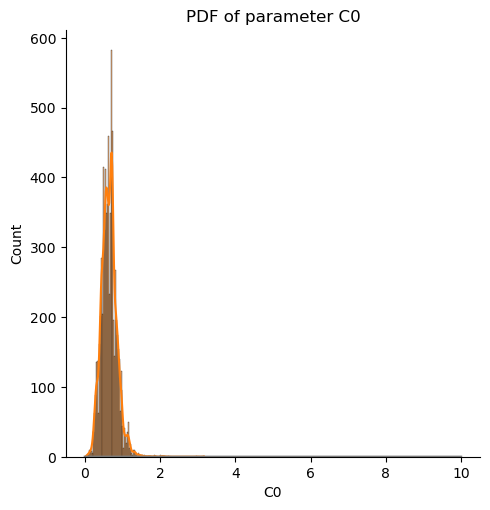

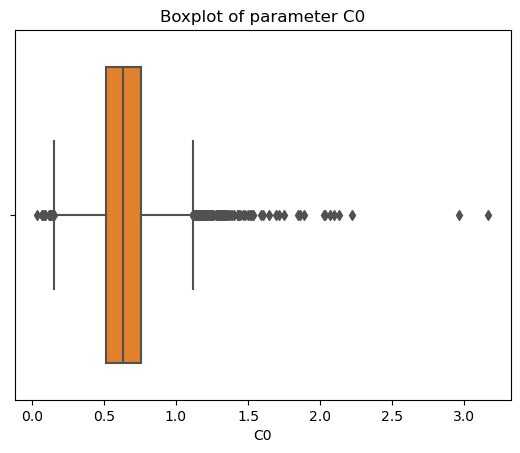

In [5]:
# Plot TT
displot(1, samples)
boxplot(1, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



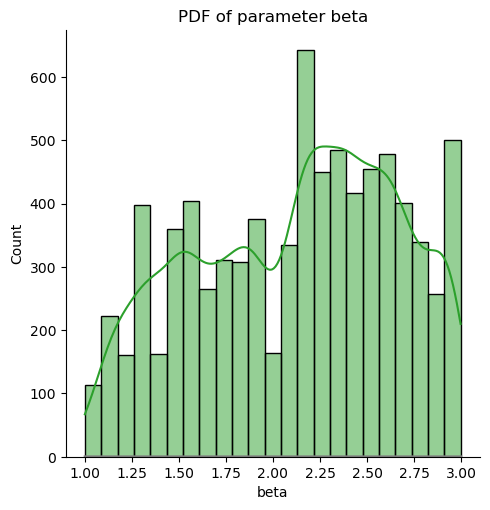

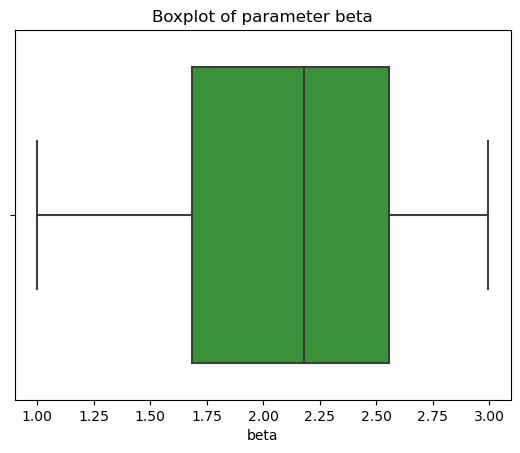

In [6]:
# Plot TT
displot(2, samples)
boxplot(2, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



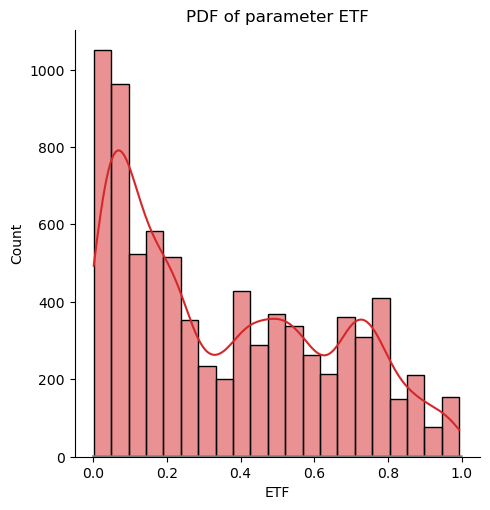

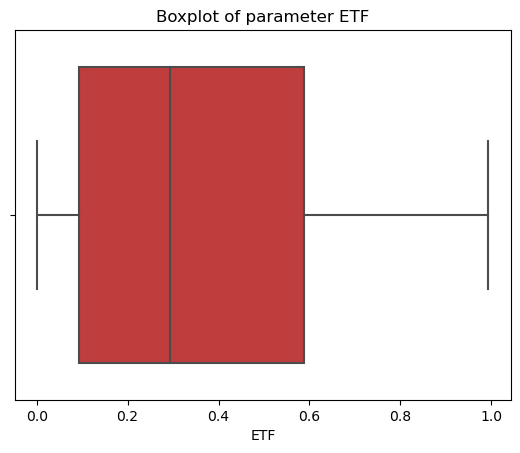

In [7]:
displot(3, samples)
boxplot(3, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



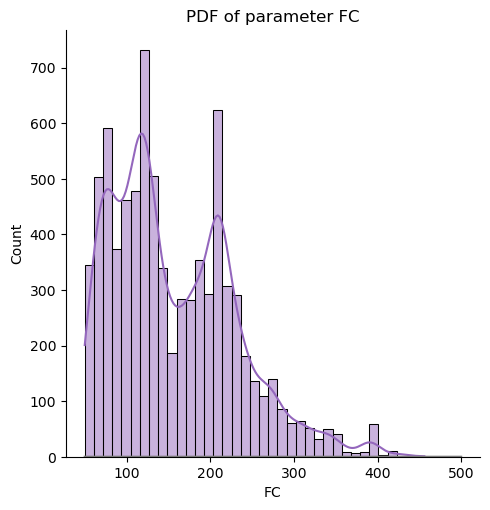

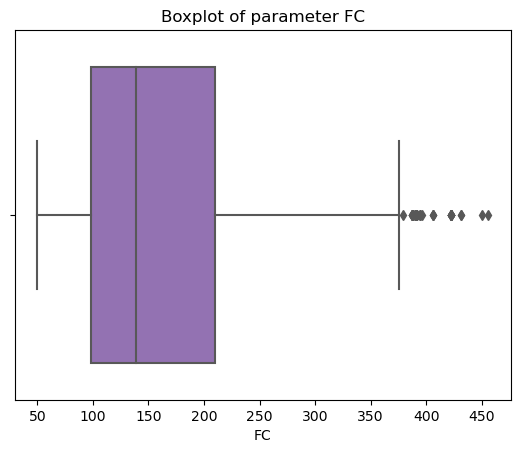

In [8]:
displot(4, samples)
boxplot(4, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



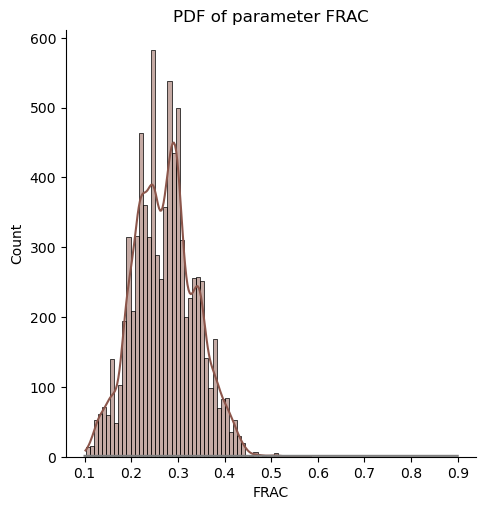

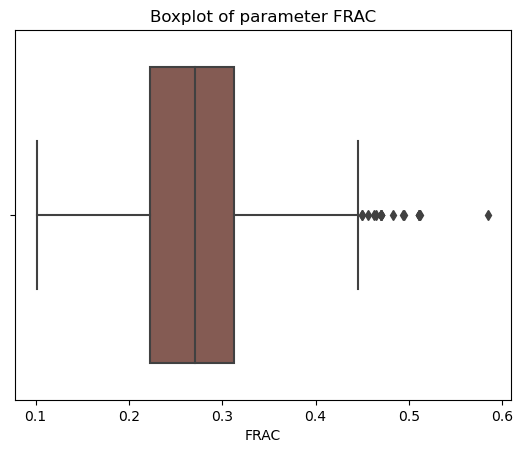

In [9]:
displot(5, samples)
boxplot(5, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



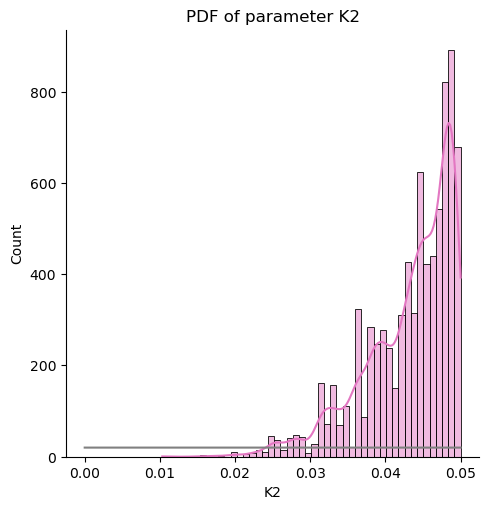

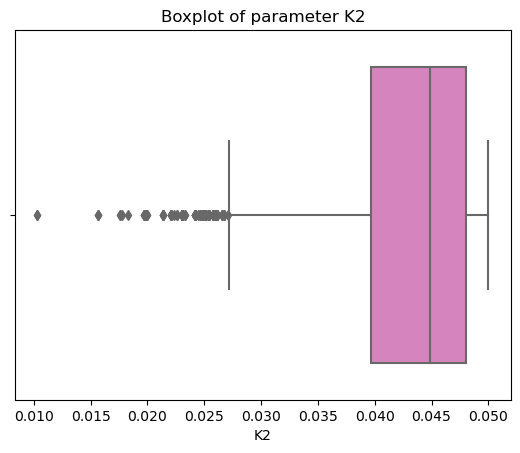

In [10]:
displot(6, samples)
boxplot(6, samples)

# Sampling

In [11]:
# Sampling Max
param_vec = []
for i in range(len(samples.loc[0])):
    values, counts = np.unique(samples.iloc[:, i], return_counts=True)
    ind = np.argmax(counts)
    param_vec.append(values[ind])

_, sampled_max, _, _ = run_model_single_parameter_node(model, param_vec)

[HVBSASK INFO] [0] parameters: [[0.9091870249505248, 0.6026969458872553, 2.1623209580033578, 0.2410515069746471, 209.52732922578295, 0.1920291403920036, 0.04910206574019607]]


In [12]:
# Mean Sampling from MCMC
sample_param = []
for i in range(7):
    sample_param.append(np.random.choice(samples.iloc[:, i], 1000))
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

print(np.array(all_results).shape)
sampled_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([1.13960258e+00, 7.33041810e-01, 2.48746727e+00, 7.11810333e-01,
       2.02538535e+02, 3.62699315e-01, 4.76557581e-02])]
[HVBSASK INFO] [0] parameters: [array([2.23882166e-02, 5.13603387e-01, 2.12891888e+00, 3.86261629e-01,
       2.97593842e+02, 3.48192046e-01, 4.52429942e-02])]
[HVBSASK INFO] [0] parameters: [array([1.28494299e+00, 7.38228559e-01, 1.93414765e+00, 4.73549297e-01,
       2.03549786e+02, 2.78330575e-01, 4.83644210e-02])]
[HVBSASK INFO] [0] parameters: [array([2.03417336e+00, 7.38769179e-01, 2.17985332e+00, 7.10503132e-01,
       1.82118462e+02, 2.41943089e-01, 4.32284640e-02])]
[HVBSASK INFO] [0] parameters: [array([3.87924537e-01, 7.06630750e-01, 2.89913644e+00, 5.70474243e-01,
       1.47622959e+02, 2.01888530e-01, 4.75403676e-02])]
[HVBSASK INFO] [0] parameters: [array([1.85605502e-01, 8.50681357e-01, 1.65831061e+00, 6.86544313e-01,
       1.00827124e+02, 2.19334617e-01, 4.33305056e-02])]
[HVBSASK INFO] [0] parameters: [array([2

In [13]:
# Mean Sampling from Start
sample_param = []
for i in range(7):
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i]).sample(1)
    sample_param.append(uni)
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

_, _, measured_data, _ = run_model_single_parameter_node(model, np.array(vec))

start_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([-3.25420672e+00,  4.74850575e+00,  1.15620273e+00,  2.26337602e-01,
        4.78060564e+02,  2.61154208e-01,  3.20366704e-02])]
[HVBSASK INFO] [0] parameters: [array([-3.25420672e+00,  4.74850575e+00,  1.15620273e+00,  2.26337602e-01,
        4.78060564e+02,  2.61154208e-01,  3.20366704e-02])]


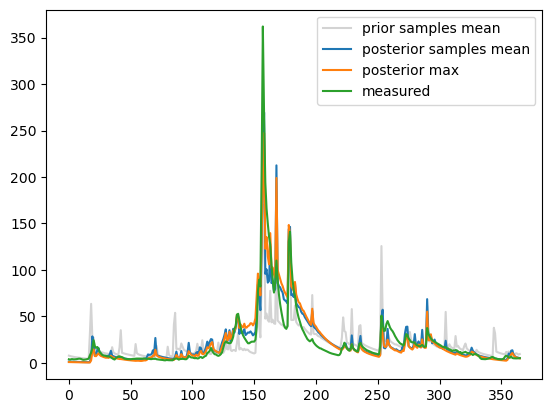

In [14]:
fig = plt.figure()
plt.plot(start_column_means, label="prior samples mean", color="lightgrey")
plt.plot(sampled_column_means, label="posterior samples mean")
plt.plot(sampled_max, label="posterior max")
plt.plot(measured_data, label="measured")
plt.legend()
plt.show()

In [15]:
t = (all_results - measured_data)[0]

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

23.201002014566793

In [16]:
t = sampled_max - measured_data

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

14.931829375180277

In [17]:
t = np.absolute(sampled_column_means - measured_data)

t.mean()

7.492448769675548

In [18]:
t = np.absolute(sampled_max - measured_data)

t.mean()

7.599760763199735